In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Kod çıktılarında bazı uyarı mesajları çıkabilmektedir. Bu uyarı mesajları bazı durumlarda kod çıktısının okunurluğunu azaltabilmektedir. Bu durumu engellemek için aşağıdaki işlemi yaptım.

In [381]:
import warnings
warnings.filterwarnings('ignore')

In [382]:
df = pd.read_csv('liver_cirrhosis.csv')

Veri setini okuduktan sonra elimde ne tür veriler olduğunu tanımak için aşağıdaki metodları kullandım.

In [383]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [384]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

# DATA PREPROCESSING

Bir klinikte 1974-1984 yılları arasında siroz teşhisiyle hastaneye kaldırılan hastaların durumlarıyla ilgili bir veri setidir. Kategorik ve nümerik veriler içermektedir.

In [386]:
df.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


Buradaki yaş N_Days değişkeni hastanın hastalık sonuçlanana kadar (ölüm veya taburcu) tedavi gördüğü gün sayısını göstermektedir.
Age değişkeninde hastanın gün cinsinden yaşı verilmiştir. Bu verinin bir anlam ifade etmesi için bunu yıl cinsinden yazmalıyız.

In [387]:
df['Age'] = df['Age'] / 360
df['Age'] = df['Age'].apply(lambda x: round(x, 2))

Aynı şekilde hastanın tedavi gördüğü süreyi de yıl cinsinden yazalım

In [388]:
df['N_Days'] = df['N_Days'] / 360
df['N_Days'] = df['N_Days'].apply(lambda x: round(x, 2))

In [389]:
df.head(3)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,6.17,C,Placebo,51.39,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,3.42,C,Placebo,54.79,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,11.62,C,Placebo,32.89,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2


N_Days değişkenine anlamlı bir isim verdim

In [390]:
df['Time'] = df['N_Days']
del df['N_Days']

# Verilerin Görselleştirilmesi

In [391]:
df.head(3)

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Time
0,C,Placebo,51.39,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,6.17
1,C,Placebo,54.79,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,3.42
2,C,Placebo,32.89,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,11.62


**1) Tedavi Süresi**

Elimdeki veriyi istatistiki olarak görmek istedim

In [392]:
mean = np.mean(df['Time'])
min = np.min(df['Time'])
max = np.max(df['Time'])
print(mean, min, max)

5.2422580000000005 0.11 13.32


<Axes: xlabel='Time', ylabel='Density'>

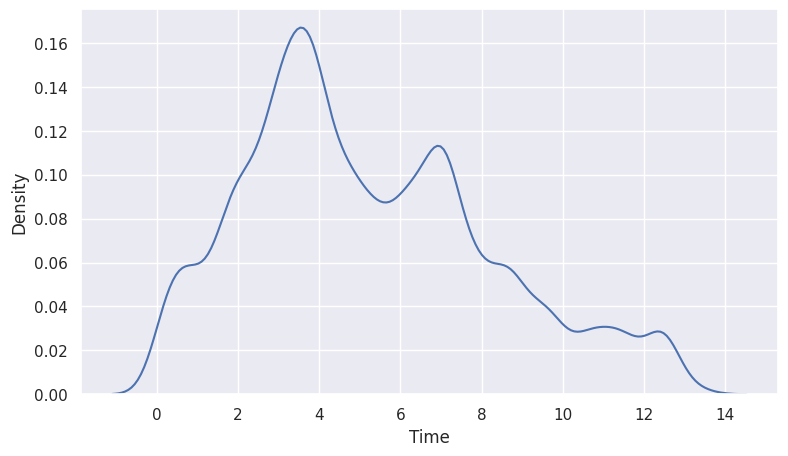

In [393]:
plt.figure(figsize = (9, 5))
sns.kdeplot(df['Time'])

Tedavi Süresi yoğunluk grafiği, genel olarak sağ eğik(Right-Skewed) türdedir. Bu durumda 10.5 yıl ve daha uzun tedavi süreleri outlier olarak adlandırılabilir. Hastalarının çoğunun tedavi süresi yaklaşık olarak 3 yıldır.

**2) Hasta Durumu**

In [394]:
df['Status'].unique()

array(['C', 'D', 'CL'], dtype=object)

C -> Yatalak/Engelli durumda olma

CL -> Siroz kaynaklı yatalaklık/Engelli durumda olma

D -> Vefat

In [395]:
c = df['Status'].value_counts()['C']
cl = df['Status'].value_counts()['CL']
d = df['Status'].value_counts()['D']

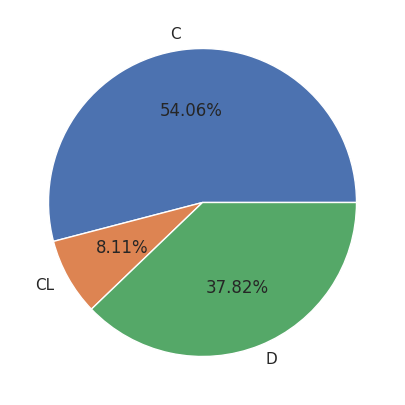

In [396]:
labels = ['C', 'CL', 'D']
values = [c, cl, d]
plt.figure(figsize = (9, 5))
plt.pie(values, labels = labels, autopct = '%1.2f%%')
plt.show()

Yukarıda belirttiğim durumların hastalarda görülme sayısının yüzdelere bölünmüş hâli

<Axes: xlabel='Age', ylabel='Status'>

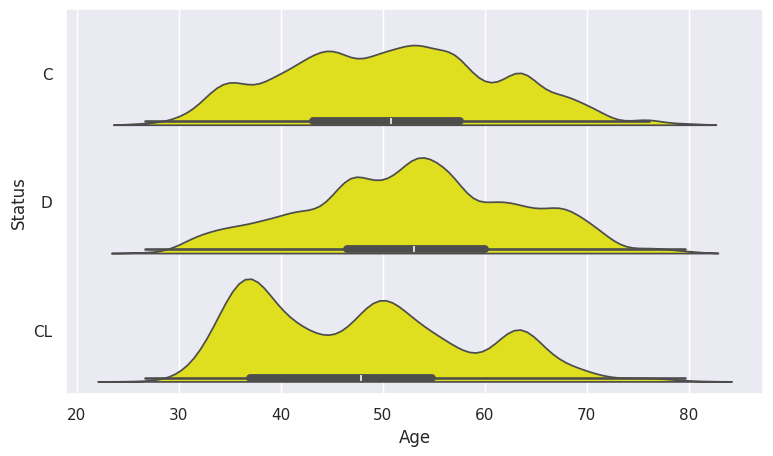

In [397]:
plt.figure(figsize = (9, 5))
sns.violinplot(x = 'Age', y = 'Status', data = df, split = True, color = 'yellow')

Yukarıda pasta grafiğine dökülmüş durumun yaşa bağlı olarak dağlımı verilmiştir.


---


Yatalak/Engelli olma durumunun yaşa bağlı grafiği normal distribution'a benzemektedir. Yani elimizdeki orta yaş(yaklaşık olarak 52) skalasında bu durum daha sık görülmektedir.


---

Aynı şekilde ölüm durumu da daha çok ortanca yaşa sahip hastalarda görüldüğünü söyleyebiliriz.


---


Siroza bağlı engellilik durumunun oluşması ise daha çok 35-40 yaş aralığında görülmektedir.






**3) Kullanılan ilaç**

Hastalara iki tür tedavi uygulanmıştır. Plasebo ve D-penicillamine

In [398]:
df['Drug'].unique()

array(['Placebo', 'D-penicillamine'], dtype=object)

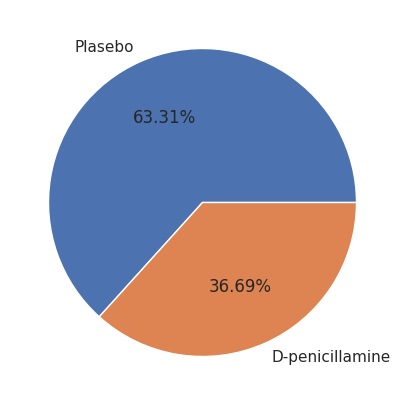

In [399]:
pla = df['Drug'].value_counts()['Placebo']
d_p = df['Drug'].value_counts()['D-penicillamine']

values = [pla, d_p]
labels = ['Plasebo', 'D-penicillamine']
plt.figure(figsize = (9, 5))
plt.pie(values, labels = labels, autopct = '%1.2f%%')
plt.show()

Hastaların neredeyse üçte ikisine plasebo uygulanmıştır.

<Axes: xlabel='Drug', ylabel='Age'>

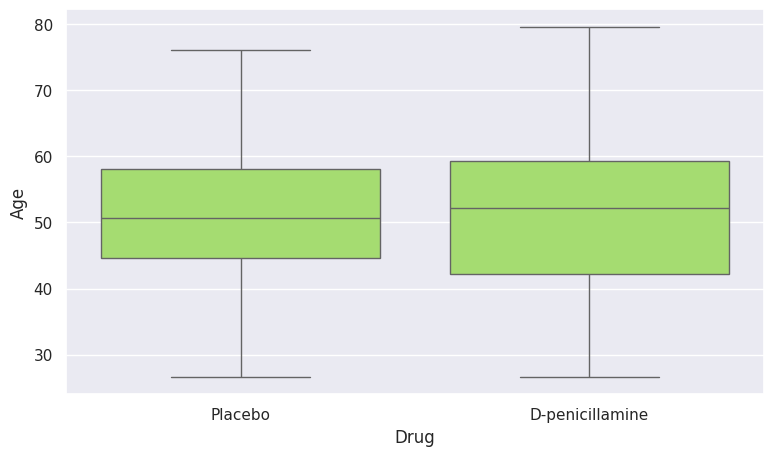

In [400]:
plt.figure(figsize = (9, 5))
sns.boxplot(data = df, x = 'Drug', y = 'Age', color = '#A5EE5F')

Grafikten anlaşılacağı üzere, uygulanan tedavi türü yaştan bağımsızdır ancak D-penicillamine tedavisinin çok yaşlı hastalarda kullanımı plaseboya göre daha sıktır. İleri yaşlardaki insanlara plasebodan ziyade ilaç tedavisi yapılmasının daha etkili olabileceği sonucu çıkarılabilir.

 4) Yaş

In [401]:
print(np.min(df['Age']))
print(np.max(df['Age']))
print(np.mean(df['Age']))
print(np.median(df['Age']))

26.66
79.58
51.3772048
51.39


Yukarıdaki hesaba göre tedavi gören hastaların ortalama yaşı 51-52'dir. Hem aşağıdaki grafikten hem de medyan ve ortalama değerin birbirlerine yakın olmasından bir normal distirbution olduğunu anlayabiliriz.

Göze çarpan bir outlier bulunmamaktadır.

<Axes: xlabel='Age', ylabel='Density'>

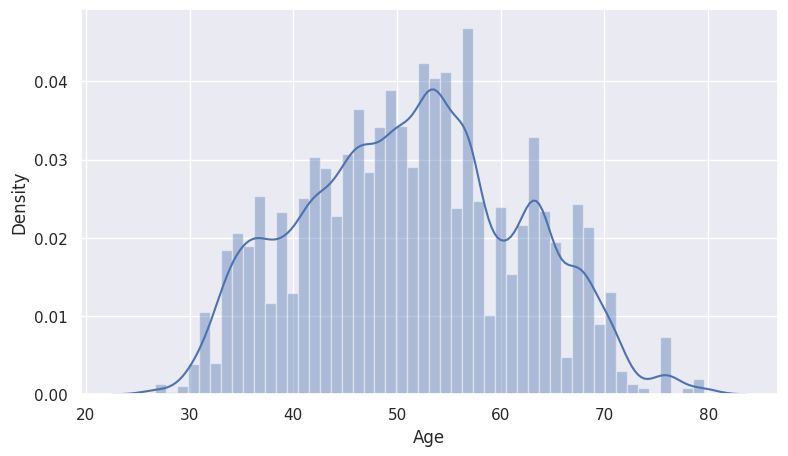

In [402]:
plt.figure(figsize = (9, 5))
sns.distplot(df['Age'])

Sonraki grafik çizimlerimde yaşı bazı durumlarda kategorik veri olarak almak istedim bu yüzden 3 kategoriye ayırdığım yaş türleriyle yeni bir sütun oluşturdum.

Genç: 4028
Orta yaş: 15522
Yaşlı: 5450


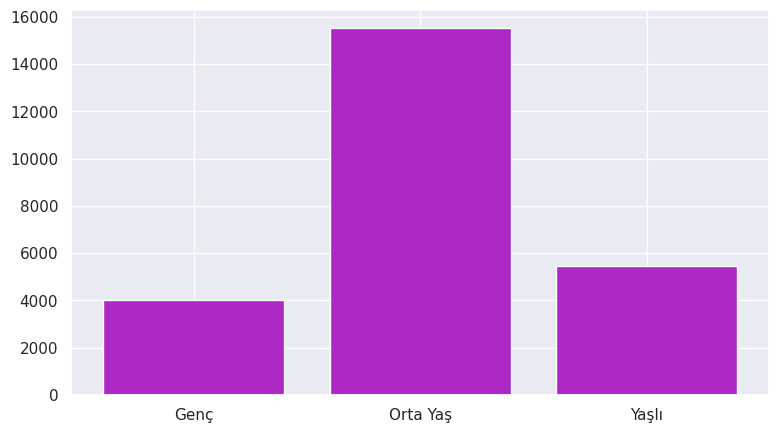

In [403]:
young_age = 0   #25-40 yaş
middle_age = 0  #40-60 yaş
old_age = 0   #+60 yaş
age_type = []


for i in df['Age']:
  if i < 40:
    young_age += 1
    age_type.append('Young')
  elif i >= 40 and i < 60:
    middle_age += 1
    age_type.append('Middle Age')
  else:
    old_age += 1
    age_type.append('Old')

df['Age_Type'] = age_type
print(f"Genç: {young_age}\nOrta yaş: {middle_age}\nYaşlı: {old_age}")
source = [young_age, middle_age, old_age]
labels = ['Genç', 'Orta Yaş', 'Yaşlı']
plt.figure(figsize = (9, 5))
plt.bar(labels, source, color = '#AD29C5')
plt.show()

Hastanede daha çok yukarıda 40-60 yaş olarak sınıflandırdığımız orta yaş grubu tedavi görmektedir.

5) Edema

Yes, No ve Sometimes değerleri almış.

In [404]:
df['Edema'].unique()

array(['N', 'Y', 'S'], dtype=object)

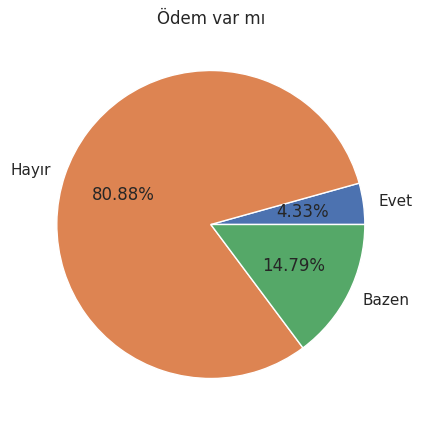

In [405]:
yes = df['Edema'].value_counts()['Y']
some = df['Edema'].value_counts()['S']
no = df['Edema'].value_counts()['N']
labels = ['Evet', 'Hayır', 'Bazen']
values = [yes, no, some]
plt.figure(figsize = (9, 5))
plt.title('Ödem var mı')
plt.pie(values, labels = labels, autopct = '%1.2f%%')
plt.show()

Tahliller sonucunda hastaların büyük çoğunluğunda ödem görülmemiştir.

**6) Hepatomegali, Spider ve Asit**

In [406]:
df.head(3)

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Time,Age_Type
0,C,Placebo,51.39,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,6.17,Middle Age
1,C,Placebo,54.79,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,3.42,Middle Age
2,C,Placebo,32.89,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,11.62,Young


Hepatomegali karaciğer büyümesi, spiders ise damar genişlemesi olarak adlandırılabilir. Başlıkta bütün veriler iki cevaplı olduğu için pasta grafiğinde göstermenin daha iyi olacağını düşündüm

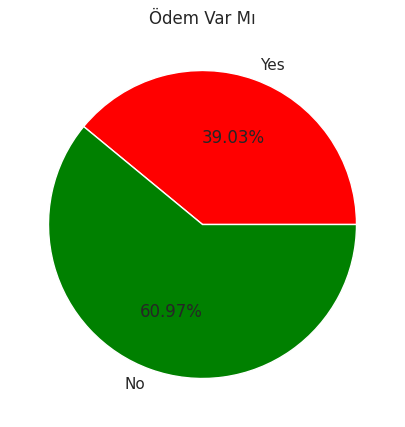

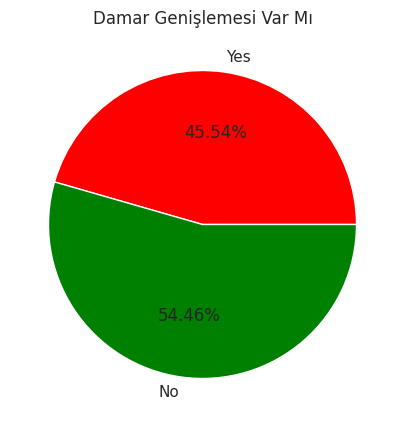

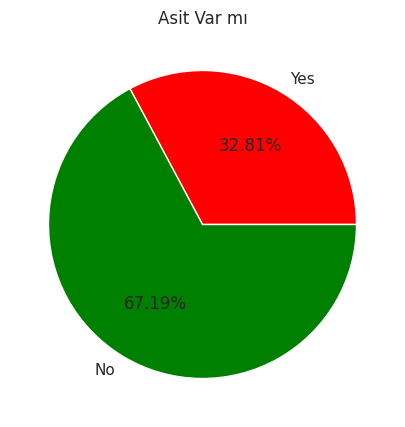

In [407]:
hep_yes = df['Hepatomegaly'].value_counts()['Y']
hep_no = df['Hepatomegaly'].value_counts()['N']

spider_yes = df['Spiders'].value_counts()['Y']
spider_no = df['Spiders'].value_counts()['N']

asit_yes = df['Ascites'].value_counts()['Y']
asit_no = df['Ascites'].value_counts()['N']

colors = ['red', 'green']
plt.figure(figsize = (9, 5))
plt.title('Ödem Var Mı')
plt.pie([hep_yes, hep_no], labels = ['Yes', 'No'], colors = colors, autopct = '%1.2f%%')
plt.show()

plt.figure(figsize = (9, 5))
plt.title('Damar Genişlemesi Var Mı')
plt.pie([spider_yes, spider_no], labels = ['Yes', 'No'], colors = colors, autopct = '%1.2f%%')
plt.show()

plt.figure(figsize = (9, 5))
plt.title('Asit Var mı')
plt.pie([asit_yes, asit_no], labels = ['Yes', 'No'], colors = colors, autopct = '%1.2f%%')
plt.show()

**7) Bilirubin**

In [408]:
print(np.max(df['Bilirubin']))
print(np.median(df['Bilirubin']))

28.0
1.3


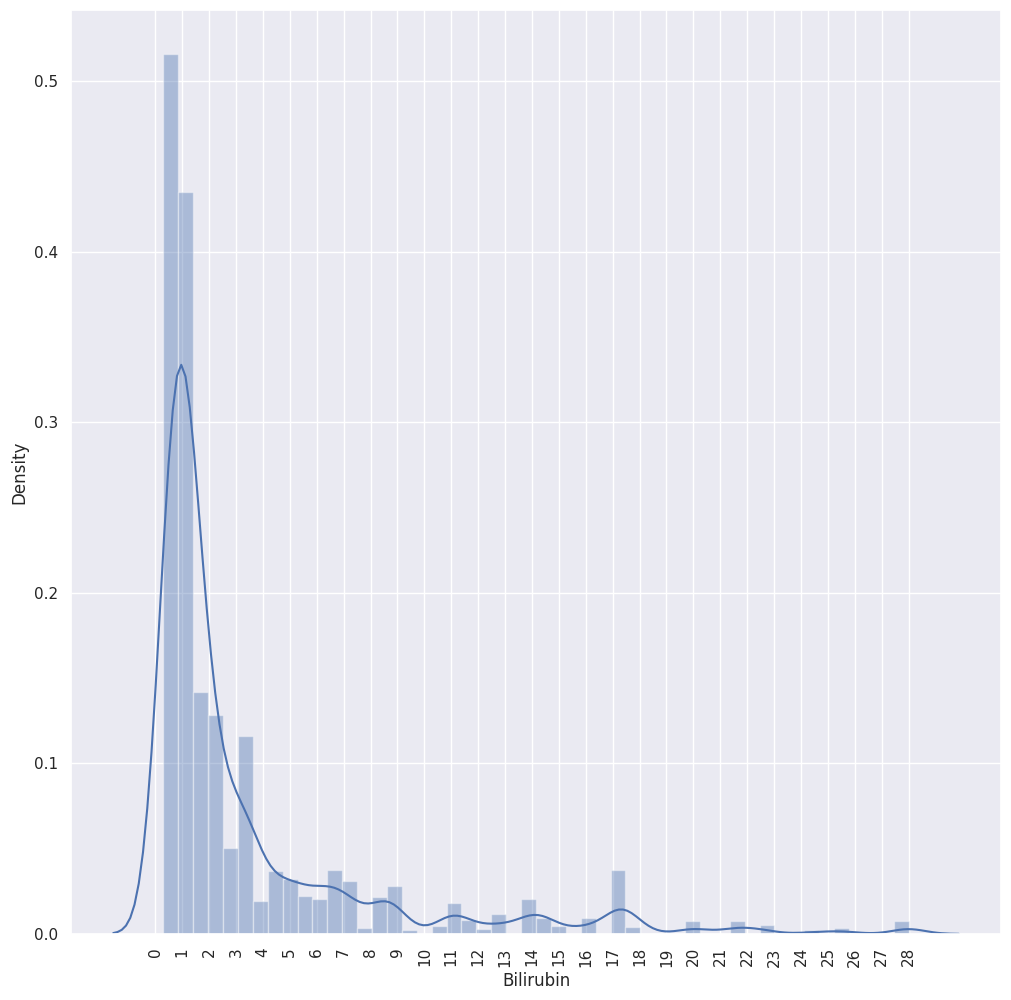

<Figure size 900x500 with 0 Axes>

In [409]:

sns.distplot(df['Bilirubin'])
a = []
i = 0
while(i <= 28):
  a.append(i)
  i += 1
plt.xticks(ticks = a, rotation = 90)
plt.figure(figsize = (9, 5))

plt.show()

Grafiğe göre hastaların bilirubin seviyesi daha çok 1.3 bandında toplanmış durumda. Çok sayıda outlier vardır, right-skewed(sağ eğik)  bir grafiktir.

Yaş-Bilirubin Grafiği

<Figure size 900x500 with 0 Axes>

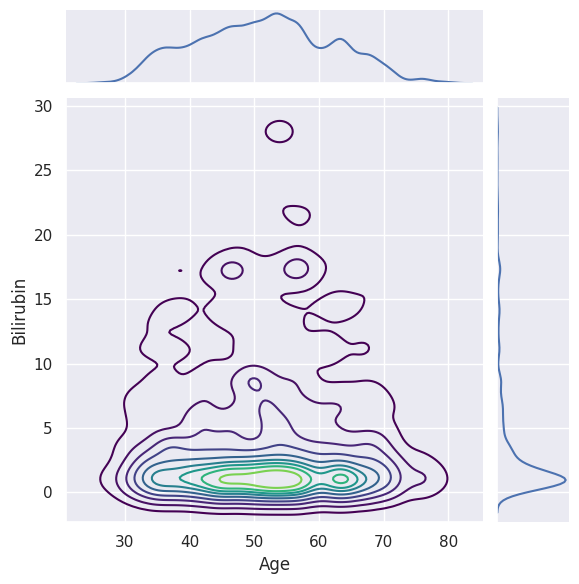

In [410]:
plt.figure(figsize = (9, 5))
sns.jointplot(data = df, x = 'Age', y = 'Bilirubin', kind = 'kde', cmap = 'viridis')

Grafikteki ısı haritasında bilirubin seviyesinin toplandığı araralık görülmektedir. Neredeyse bütün yaş gruplarında 0.5-4.5 bandında toplandığı aşikârdır. Aşırı düzeyde bilirubin miktarı genelde 45-65 yaş aralığında görülmektedir.

**8) Kolesterol**

Bazı istatistiki değerleri görmek istedim

In [411]:
print(np.mean(df['Cholesterol']))
print(np.min(df['Cholesterol']))
print(np.max(df['Cholesterol']))
print(np.median(df['Cholesterol']))

372.33147127416
120.0
1775.0
369.5105634


<Axes: xlabel='Status', ylabel='Cholesterol'>

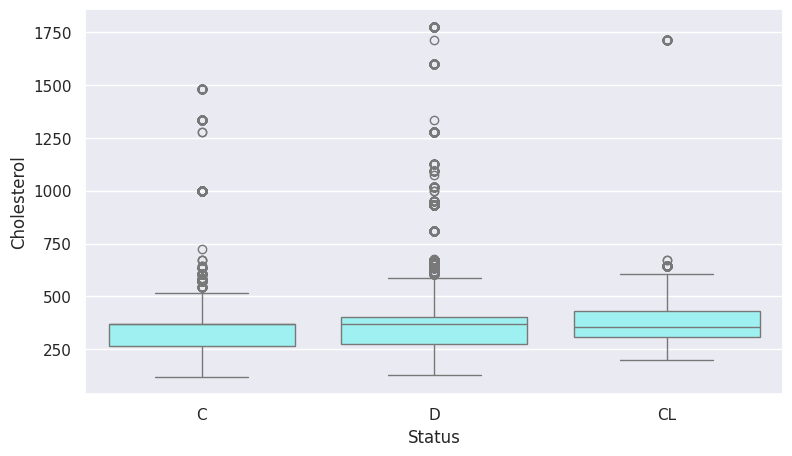

In [412]:
plt.figure(figsize = (9, 5))
sns.boxplot(data = df, x = 'Status', y = 'Cholesterol', color = '#90FFFD')

Yüksek miktarda outlier bulunmaktadır.

Kolesterol seviyesi yüksek olan hastalarda vefat durumu daha sık görülmektedir.

In [413]:
df.head(3)

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Time,Age_Type
0,C,Placebo,51.39,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,6.17,Middle Age
1,C,Placebo,54.79,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,3.42,Middle Age
2,C,Placebo,32.89,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,11.62,Young


**9) Albumin**

<Axes: xlabel='Albumin', ylabel='Density'>

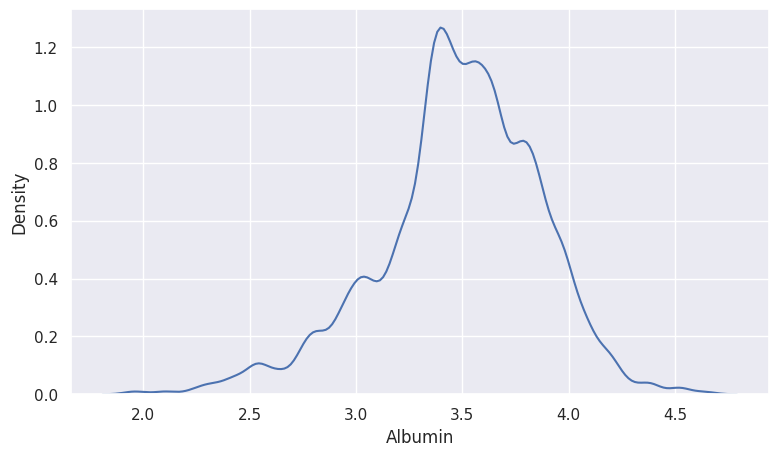

In [414]:
plt.figure(figsize = (9, 5))
sns.kdeplot(df['Albumin'])

Grafiğe baktığımız zaman hastaların çoğunda albumin miktarının 3.5 gm/dl olduğu görilmektedir. 2.0 gm/dl albumin miktarının bir outlier olduğu söylenebilir.

<Axes: xlabel='Sex', ylabel='Albumin'>

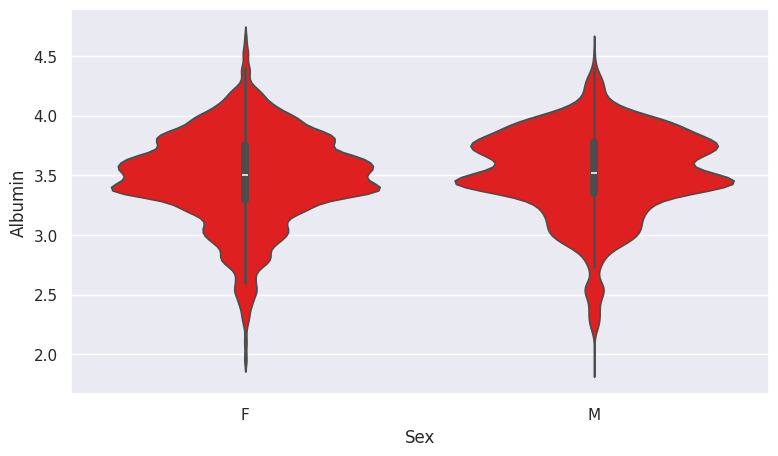

In [415]:
plt.figure(figsize = (9, 5))
sns.violinplot(data = df, x = 'Sex', y = 'Albumin', color = 'red')

Cinsiyete göre albumin miktarına bakıldığı zaman, kadınlarda ve erkeklerde hemen hemen aynı dağılımın olduğunu gözlemleyebiliriz.

<Axes: xlabel='Status', ylabel='Albumin'>

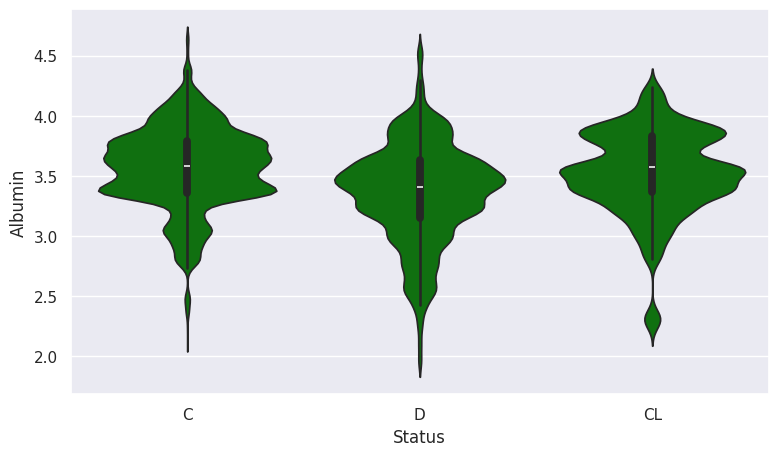

In [416]:
plt.figure(figsize = (9, 5))
sns.violinplot(data = df, x = 'Status', y = 'Albumin', color = 'green')

**10) Bakır**

<Axes: xlabel='Copper', ylabel='Density'>

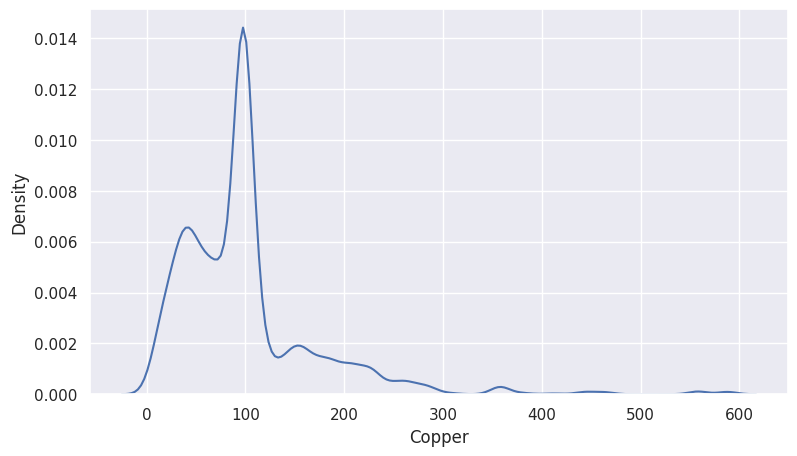

In [417]:
plt.figure(figsize = (9, 5))
sns.kdeplot(df['Copper'])

<Figure size 900x500 with 0 Axes>

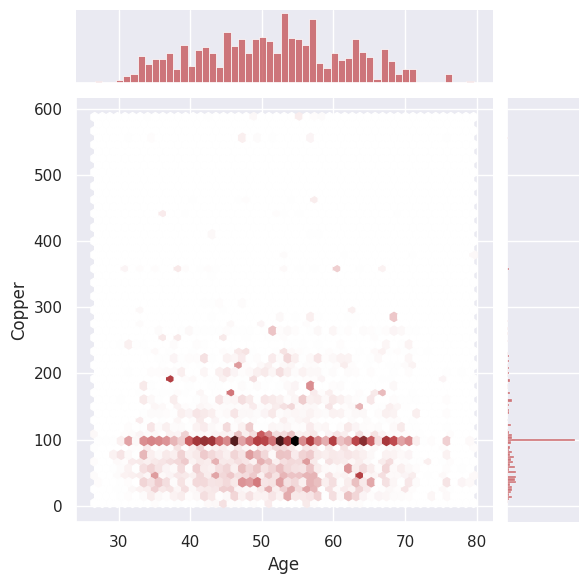

In [418]:
plt.figure(figsize = (9, 5))
sns.jointplot(x = 'Age', y = 'Copper', data = df, kind = 'hex', color = 'r')

Yukarıdaki grafikte yaşa göre idrardaki bakır miktarı verilmiştir. Koyu renkli altıgenlerin olduğu hattan anlaşılacağı üzere hastaların çoğunun idrarındak bakır miktarı 100 ug/day civarındadır.

**11) Alkalin Fosfataz**

<Axes: xlabel='Alk_Phos', ylabel='Density'>

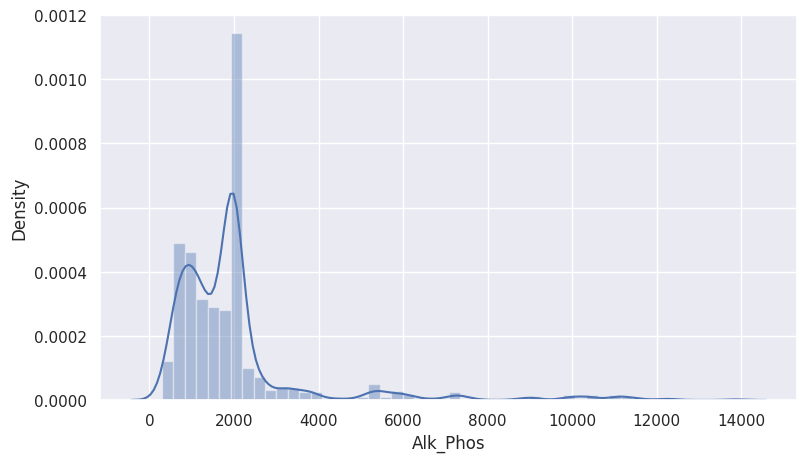

In [419]:
plt.figure(figsize = (9, 5))
sns.distplot(df['Alk_Phos'])

<Figure size 900x500 with 0 Axes>

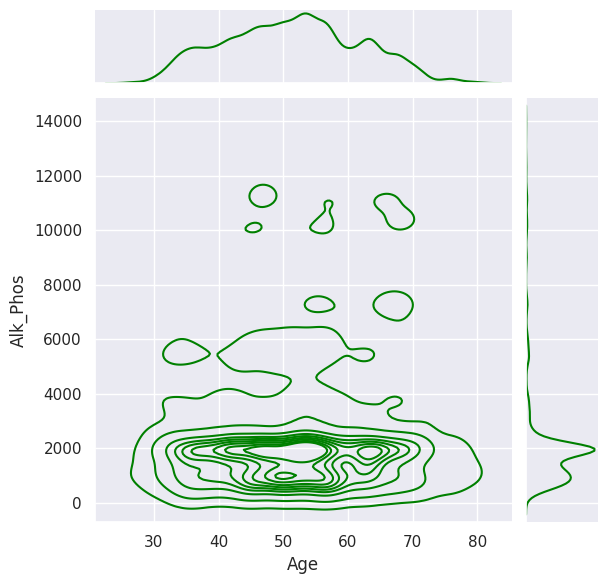

In [420]:
plt.figure(figsize = (9, 5))
sns.jointplot(data = df, x = 'Age', y = 'Alk_Phos', color = 'green', kind = 'kde')

Her iki grafikten de anlaşılacağı üzere Alkalin Fosfataz seviyesi daha 2000, akabinde 1500 U/liter seviyelerinde toplanmıştır.

<Axes: xlabel='Sex', ylabel='Alk_Phos'>

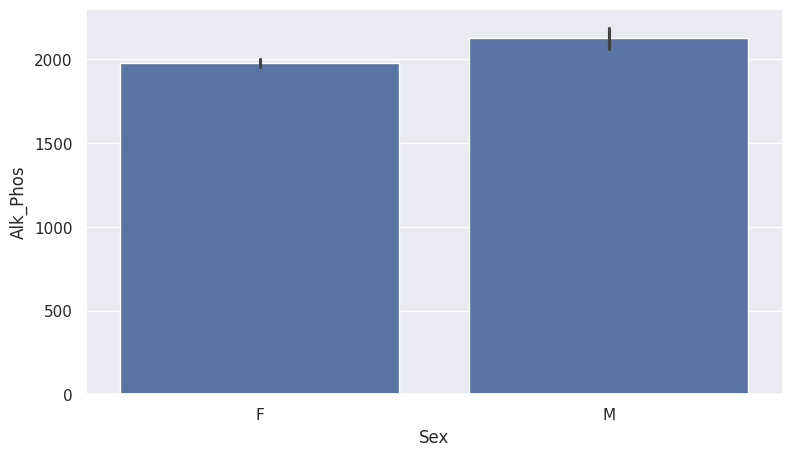

In [421]:
plt.figure(figsize = (9, 5))
sns.barplot(data = df, x = 'Sex', y = 'Alk_Phos', estimator = np.mean)

Alkalin fosfataz seviyesinin, erkeklerde kadınlara kıyasla birazcık daha fazla olduğu görülmektedir.

In [422]:
df.head(2)

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Time,Age_Type
0,C,Placebo,51.39,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.7,57.0,256.0,9.9,1,6.17,Middle Age
1,C,Placebo,54.79,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.0,75.0,220.0,10.8,2,3.42,Middle Age


**12) SGOT**

SGOT, karaciğerde bulunan bir enzimdir ve yüksek miktarda bulunması durumunda siroz gibi karaciğer hastalıkları görülebilir.

<Axes: xlabel='Status', ylabel='SGOT'>

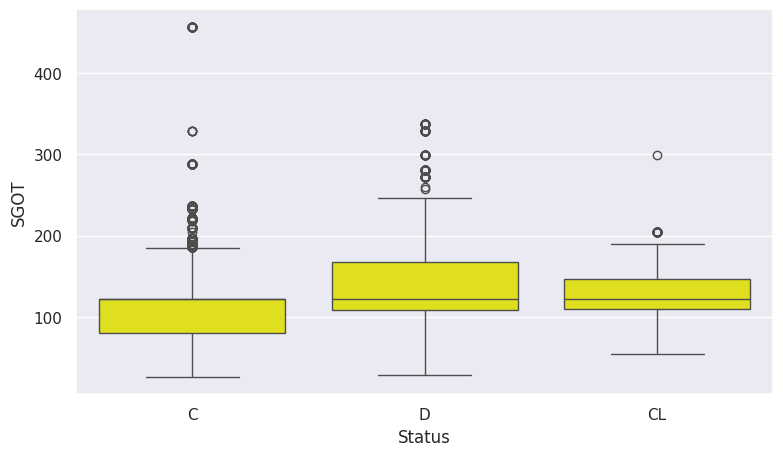

In [423]:
plt.figure(figsize = (9, 5))
sns.boxplot(data = df, x = 'Status', y = 'SGOT', color = 'yellow')

Outlier değerleri hariç tutup bir genelleme yapacak olursak, vefat eden hastaların SGOT değerleri diğer hastalara göre daha yüksekti.

**13) Trigliserid**

<Axes: xlabel='Tryglicerides', ylabel='Density'>

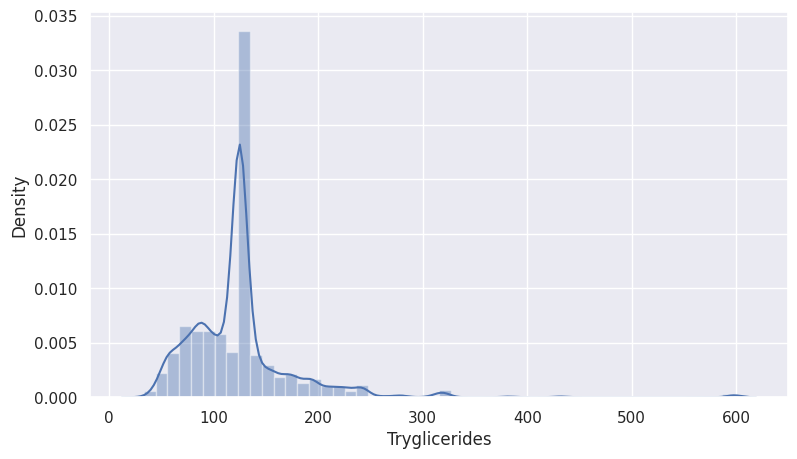

In [424]:
plt.figure(figsize = (9, 5))
sns.distplot(df['Tryglicerides'])

<Axes: xlabel='Stage', ylabel='Tryglicerides'>

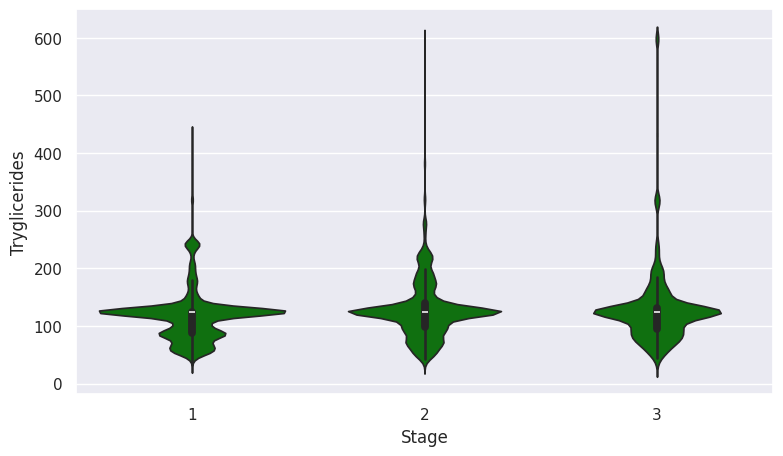

In [425]:
plt.figure(figsize = (9, 5))
sns.violinplot(data = df, x = 'Stage', y = 'Tryglicerides', color = 'green')

Sirozun 3 evresinde de hastalar ortalama olarak benzer eğilimlerle trigliserid oranına sahip. Ancak hastalığın yüksek evrelerinde outlier olarak adlandırabileceğimiz değerler belirginleşmekte, bir diğer deyişle ileriki evrelerdeki hastalarda çok yüksek trigliserid görülme oranı artmaktadır.

**14) Trombosit**

Text(0.5, 0, 'Cinsiyet')

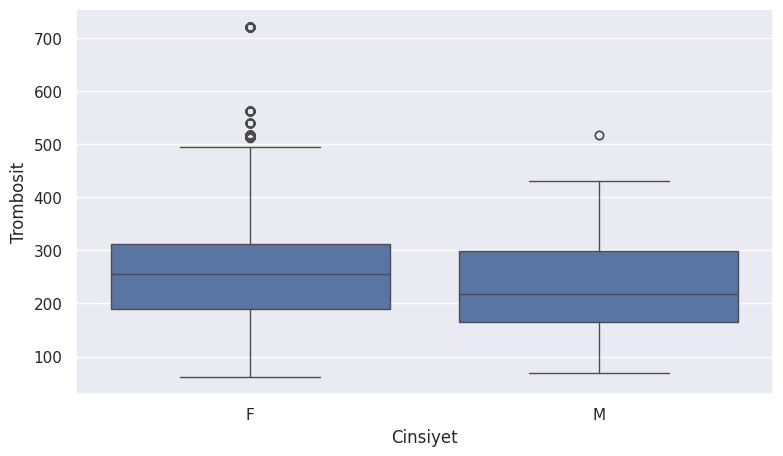

In [426]:
plt.figure(figsize = (9, 5))
sns.boxplot(data = df, x = 'Sex', y = 'Platelets')
plt.ylabel('Trombosit')
plt.xlabel('Cinsiyet')

Kadınlardaki trombosit oranı erkeklere göre daha fazladır.

**15) Protrombin**

<Axes: xlabel='Prothrombin', ylabel='Density'>

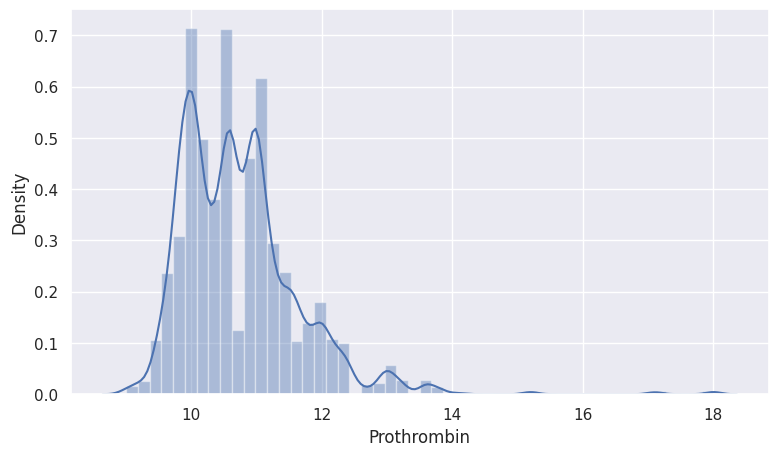

In [427]:
plt.figure(figsize = (9, 5))
sns.distplot(df['Prothrombin'])

Hastalarda protrombinin daha çok 10-11 bandında toplandığı gözlemlenmektedir.

Text(0, 0.5, 'Protrombin')

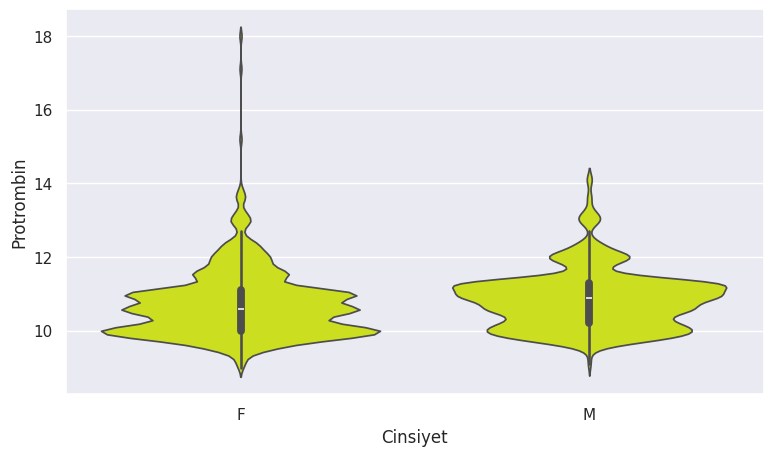

In [428]:
plt.figure(figsize = (9, 5))
sns.violinplot(data = df, x = 'Sex', y = 'Prothrombin', color = '#E4FF00')
plt.xlabel('Cinsiyet')
plt.ylabel('Protrombin')

Ortalama göz önünde bulundurulduğunda protrombin miktarı kadınlarda ve erkeklerde benzer eğilim göstermektedir. Ancak ortalamanın çok üstünde(outlier) protrombin görülme durumunun yalnızca kadınlarda olduğu gözlemlenmektedir.

**16) Hastalık Evresi**

1-2-3 olmak üzere siroz hastalığının üç evresi bulunmaktadır.

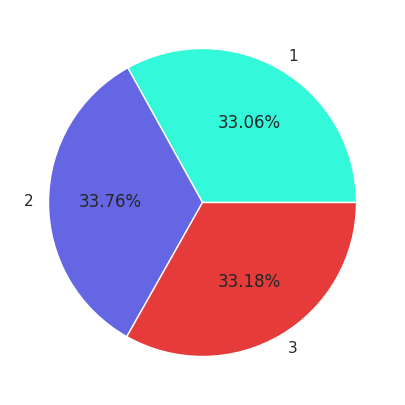

In [429]:
one = df['Stage'].value_counts()[1]
two = df['Stage'].value_counts()[2]
three = df['Stage'].value_counts()[3]

values = [one, two, three]
labels = ['1', '2', '3']
colors = ['#34F8DA', '#6466E3', '#E53B3B']

plt.figure(figsize = (9, 5))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')
plt.show()

Hastanede neredeyse her evrede tedavi gören hasta sayısı kabaca eşittir denebilir.

Şimdi bu evreleri yaşa göre inceleyelim

Text(0, 0.5, 'Evre')

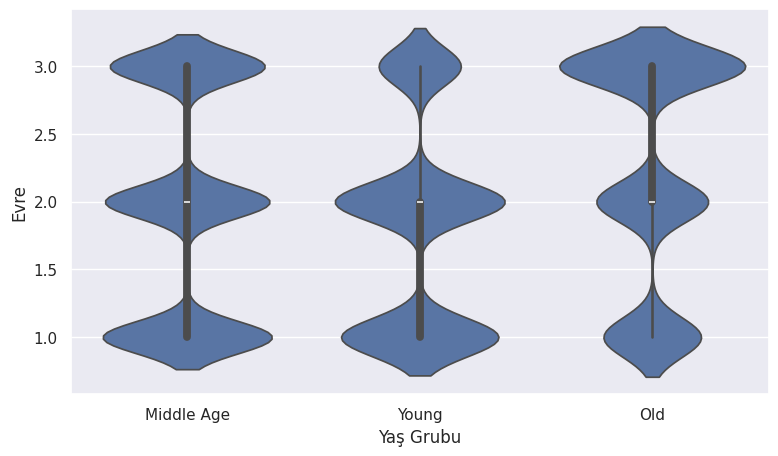

In [430]:
plt.figure(figsize = (9, 5))
sns.violinplot(data = df, x = 'Age_Type', y = 'Stage')
plt.xlabel('Yaş Grubu')
plt.ylabel('Evre')

Grafiğe göre hastalığın son evresi daha çok yaşlı insanlarda görülürken bu oran gençlerde çok daha azdır. Orta yaş grubunda ise dengeli bir dağılım görülmektedir.

**18) Cinsiyet**

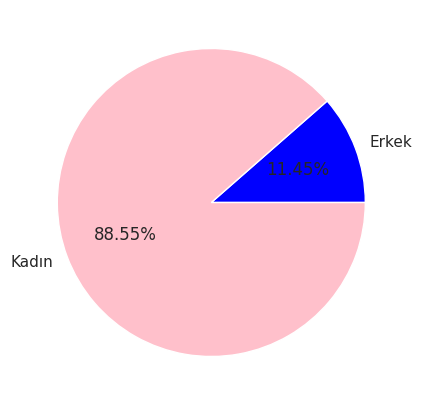

In [431]:
male = df['Sex'].value_counts()['M']
female = df['Sex'].value_counts()['F']

values = [male, female]
labels = ['Erkek', 'Kadın']
colors = ['blue', 'pink']

plt.figure(figsize = (9, 5))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')
plt.show()

Tedavi gören hastaların büyük çoğunluğunu kadınlar oluşturmaktadır.

# Korelasyon Analizi

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         25000 non-null  object 
 1   Drug           25000 non-null  object 
 2   Age            25000 non-null  float64
 3   Sex            25000 non-null  object 
 4   Ascites        25000 non-null  object 
 5   Hepatomegaly   25000 non-null  object 
 6   Spiders        25000 non-null  object 
 7   Edema          25000 non-null  object 
 8   Bilirubin      25000 non-null  float64
 9   Cholesterol    25000 non-null  float64
 10  Albumin        25000 non-null  float64
 11  Copper         25000 non-null  float64
 12  Alk_Phos       25000 non-null  float64
 13  SGOT           25000 non-null  float64
 14  Tryglicerides  25000 non-null  float64
 15  Platelets      25000 non-null  float64
 16  Prothrombin    25000 non-null  float64
 17  Stage          25000 non-null  int64  
 18  Time  

In [433]:
df.head(3)

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Time,Age_Type
0,C,Placebo,51.39,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,6.17,Middle Age
1,C,Placebo,54.79,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,3.42,Middle Age
2,C,Placebo,32.89,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,11.62,Young


Korelasyon katsayısı -1 ile 1 arasında değerler alır. Korelasyon katsayısının mutlak değeri 1'e yaklaştıkça iki değişken arasındaki doğrusal ilişkini arttığı söylenebilir. 1 korelasyon katsayısı, iki değişken arasında tam bir doğru oran olduğunu belirtirken -1 korelasyonn katsayısı bu iki değişken arasında tam bir ters orantı olduğunu belirtir. Korelasyon katsayısının 0 çıkması ise o iki değişken arasında herhangi bir ilişki olmadığını gösterir.

Elimde hem kategorik hem de nümerik veriler olduğu için direkt olarak korelasyon analizi yapamıyordum. Bu yüzden aşağıdaki yöntemle yalnızca nümerik verilere korelasyon analizi yapılmasını sağladım.

In [434]:
numeric_columns = df.select_dtypes(include=np.number)
correlation = numeric_columns.corr()

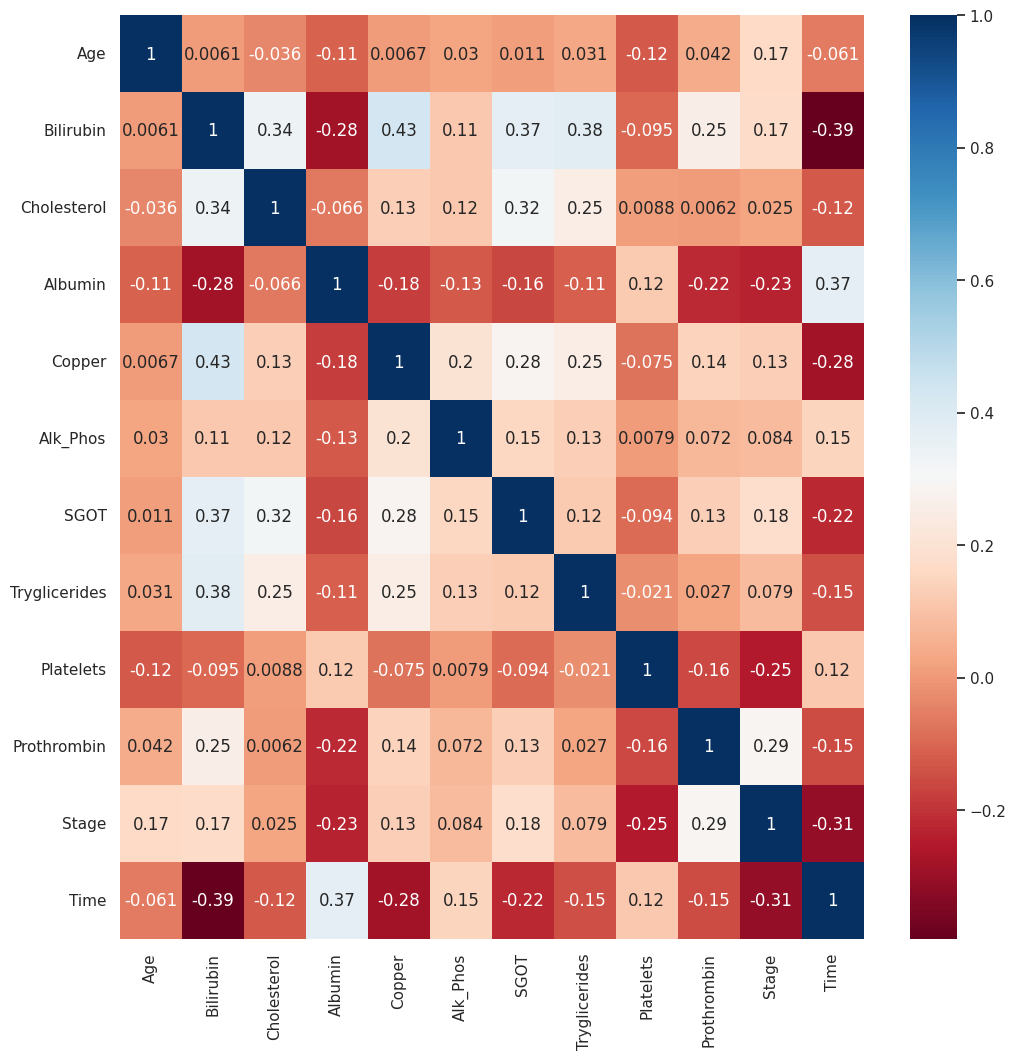

In [435]:
# Bu kod bloğunu Enes Bey'in bootcamp pdf'inde paylaştığı örnek dosyadan aldım :)
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(correlation, cmap="RdBu", annot=True)
plt.show()

Yukarıdaki korelasyon tablosunda veri setindeki sayısal verilerin birbirleriyla olan ilişkileri gösterilmiştir.

In [436]:
df.isnull().sum()

Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Time             0
Age_Type         0
dtype: int64

Elimizde hiç boş veri yoktur.

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         25000 non-null  object 
 1   Drug           25000 non-null  object 
 2   Age            25000 non-null  float64
 3   Sex            25000 non-null  object 
 4   Ascites        25000 non-null  object 
 5   Hepatomegaly   25000 non-null  object 
 6   Spiders        25000 non-null  object 
 7   Edema          25000 non-null  object 
 8   Bilirubin      25000 non-null  float64
 9   Cholesterol    25000 non-null  float64
 10  Albumin        25000 non-null  float64
 11  Copper         25000 non-null  float64
 12  Alk_Phos       25000 non-null  float64
 13  SGOT           25000 non-null  float64
 14  Tryglicerides  25000 non-null  float64
 15  Platelets      25000 non-null  float64
 16  Prothrombin    25000 non-null  float64
 17  Stage          25000 non-null  int64  
 18  Time  

  **OUTLIER ANALİZİ**

Outlier, yani aykırı değerler özellikle makine öğrenmesi modellerinde yanlış öğrenmeye yol açıp skorumu azaltacağı için müdahale edilmesi gereken değerlerdir. Outlier verileri silerek veya yerine başka değer atayarak bu durumu düzeltebiliriz

Ancak veri silmek akabinde overfitting gibi istenmeyen sonuçlar doğuracağı için pek de tercih edilmemesi gereken bir opsiyondur. Yine de onu gösterelim

NOT: Sağlık alanında bir veri seti üzerine çalıştığım için outlier değerleri silmenin ciddi sorunlara yol açacağını düşünüyorum çünkü her hasta kendine özgü semptom gösterebilmektedir.

In [438]:
q1 = np.percentile(df['Cholesterol'], 25)
q3 = np.percentile(df['Cholesterol'], 75)
iqr = q3 - q1
upper_bound = 1.5 * iqr + q3
lower_bound = q1 - 1.5 * iqr

print(upper_bound)
print(lower_bound)

511.27640850000006
133.23415489999996


veri setimizi 4 çeyreğe bölüyoruz. Her bir çeyrek iqr(interquartile) adını alır. 1. çeyrekten 1.5 iqr kadar düşük veriler ve 3. çeyrekten 1.5 iqr kadar büyük veriler outlier olarak adlandırılır. Bu verilere işlem yapılır

In [439]:
outliers = []
outlier_num = 0
for element in df['Cholesterol']:
  if element > upper_bound or element < lower_bound:
    outlier_num += 1
    outliers.append(element)


print(f"Outlier sayısı: {outlier_num}")


filtering_cholesterol = []
for j in df['Cholesterol']:
  if j not in outliers:
    filtering_cholesterol.append(j)



Outlier sayısı: 2252


Üst blokta ayırdığım üst ve alt limit değerlerine göre hangi değerlerin outlier olduğunu belirledim. Sonrasında kolesterol değerini filtrelediğim bir dizi oluşturdum ve outlier olmayan değerleri ona atadım. Böylece veri setimin ilgili sütununu outlier değerlerden arındırmış oldum.

<Axes: >

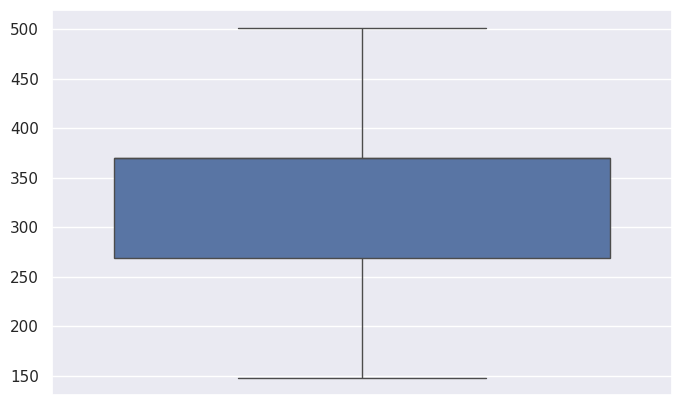

In [440]:
plt.figure(figsize = (8, 5))
sns.boxplot(filtering_cholesterol)

Outlier değerler silindikten sonra kolesterol grafiği böyle bir hâl almıştır. 133'ten küçük ve 511'den büyük değerler silinmiştir.

Ancak veri setinden veri silmek bazı durumlarda büyük kayıplara yol açabilir, bu yüzden bu sefer de outlier verileri silmektense ortalama bir değere atayalım

In [441]:
q1 = np.percentile(df['Prothrombin'], 25)
q3 = np.percentile(df['Prothrombin'], 75)
iqr = q3 - q1
upper_bound = 1.5 * iqr + q3
lower_bound = q1 - 1.5 * iqr

print(upper_bound)
print(lower_bound)

12.75
8.350000000000001


In [442]:
outliers = []
outlier_num = 0
for element in df['Prothrombin']:
  if element > upper_bound or element < lower_bound:
    outlier_num += 1
    outliers.append(element)


print(f"Outlier sayısı: {outlier_num}")


Outlier sayısı: 772


In [443]:
mean_prothrombin = np.mean(df['Prothrombin'])
print(mean_prothrombin)

filtering_prothrombin = []
for i in df['Prothrombin']:
  if i in outliers:
    i = mean_prothrombin
    filtering_prothrombin.append(i)
  else:
    filtering_prothrombin.append(i)

10.734548923081599


Bu sefer ilgili sütunun ortalamasını hesapladım. Üst blokta outlier değer aralıklarını belirlemiştim. Şimdi de filtrelenmiş bir dizi oluşturup değerleri, eğer outlier ise ortalamaya eşitleyip, oluşturduğum yeni diziye atadım